In [1]:
#importing libraries
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#Getting the data from the given file
data = pd.read_csv("train.csv")

In [4]:
#Checking the number of rows & columns
data.shape

(1460, 81)

#### So, we have a dataset with 81 columns & 1460 rows

In [5]:
#Settings to set maximum rows & maximum columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [7]:
#Let's get some more info about the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
#Checking for null values
pd.isnull(data).sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
#Function for getting null percentage in the decreasing order of percentage of null values
def getNullPercentages(df):
    return pd.DataFrame(np.round(100*pd.isnull(df).sum()/len(df),2), columns = ['null_percentage']).sort_values(['null_percentage'], ascending = False)

In [10]:
#Null values as percentage
df = getNullPercentages(data)
df

null_percentage
PoolQC                   99.52
MiscFeature              96.30
Alley                    93.77
Fence                    80.75
FireplaceQu              47.26
LotFrontage              17.74
GarageYrBlt               5.55
GarageCond                5.55
GarageType                5.55
GarageFinish              5.55
GarageQual                5.55
BsmtFinType2              2.60
BsmtExposure              2.60
BsmtQual                  2.53
BsmtCond                  2.53
BsmtFinType1              2.53
MasVnrArea                0.55
MasVnrType                0.55
Electrical                0.07
Id                        0.00
Functional                0.00
Fireplaces                0.00
KitchenQual               0.00
KitchenAbvGr              0.00
BedroomAbvGr              0.00
HalfBath                  0.00
FullBath                  0.00
BsmtHalfBath              0.00
TotRmsAbvGrd              0.00
GarageCars                0.00
GrLivArea                 0.00
GarageArea                0.00
PavedDrive                0.00
WoodDeckSF                0.00
OpenPorchSF               0.00
EnclosedPorch             0.00
3SsnPorch                 0.00
ScreenPorch               0.00
PoolArea                  0.00
MiscVal                   0.00
MoSold                    0.00
YrSold                    0.00
SaleType                  0.00
SaleCondition             0.00
BsmtFullBath              0.00
HeatingQC                 0.00
LowQualFinSF              0.00
LandSlope                 0.00
OverallQual               0.00
HouseStyle                0.00
BldgType                  0.00
Condition2                0.00
Condition1                0.00
Neighborhood              0.00
LotConfig                 0.00
YearBuilt                 0.00
Utilities                 0.00
LandContour               0.00
LotShape                  0.00
Street                    0.00
LotArea                   0.00
MSZoning                  0.00
OverallCond               0.00
YearRemodAdd              0.00
2ndFlrSF                  0.00
BsmtFinSF2                0.00
1stFlrSF                  0.00
CentralAir                0.00
MSSubClass                0.00
Heating                   0.00
TotalBsmtSF               0.00
BsmtUnfSF                 0.00
BsmtFinSF1                0.00
RoofStyle                 0.00
Foundation                0.00
ExterCond                 0.00
ExterQual                 0.00
Exterior2nd               0.00
Exterior1st               0.00
RoofMatl                  0.00
SalePrice                 0.00

## Data Understanding & Preparation

In [11]:
#Let's check the value in column 'PoolQC'
data['PoolQC'].astype('category').value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

As seen above, we have only 7 rows of actual data
As checked from the data dictionary NA means 'No Pool' i.e. there is no pool present.<br>
Let's drop this columns due to the following two reasons:<br>
1) As seen from the null percentage, 99.52% of the data has no pool.
So, let's drop this column as it does not seem to contain enough information. <br>
2) Secondly, keeping it would create 3 extra columns as its a categorical variable.

In [12]:
#Dropping column 'PoolQC'
data.drop(['PoolQC'],inplace = True, axis = 1)

In [13]:
# Moving on to the next column i.e. 'MiscFeature' which has 96.3% Null values
data['MiscFeature'].astype('category').value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

As seen above, we have only 3.7% of rows containg value other than NaN
As checked from the data dictionary NA means 'None' i.e. no miscellaneous feature not covered in other categories <br>
Let's drop this columns due to the following two reasons:<br>
1) As seen from the null percentage, 96.3% of the data has None.
So, let's drop this column as it does not seem to contain enough information (variance). <br>
2) Secondly, keeping it would create 4 extra columns as its a categorical variable.

In [14]:
#Dropping column 'MiscFeature'
data.drop(['MiscFeature'], inplace = True, axis = 1)

In [15]:
#Let's move on the next column i.e. 'Alley' with 93.77% null values
#Alley means a narrow passageway between or behind buildings
data['Alley'].astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

As seen above, we have only 6.33% of rows containg value other than NaN
As checked from the data dictionary NA means No alley access <br>
Let's drop this columns due to the following two reasons:<br>
1) As seen from the null percentage, 93.77% of the data has None.
So, let's drop this column as it does not seem to contain enough information (variance). <br>
2) Secondly, keeping it would create 1 extra column as its a categorical variable.

In [16]:
#Dropping column 'Alley'
data.drop(['Alley'], axis = 1, inplace = True)

In [17]:
#Let's move on to the next column i.e. 'Fence' with 80.75% null values
data['Fence'].astype('category').value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

As per the data dictionary, NaN in this column mean 'No Fence'. So, let's impute the null values


In [18]:
data['Fence'] = data['Fence'].fillna('No fence')

In [19]:
data['FireplaceQu'].astype('category').value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

As per the data dictionary, NaN in this column mean 'No Fireplace'. So, let's impute the null values


In [20]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('No fireplace')

In [21]:
data['LotFrontage'].astype('category').value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
79.0      17
72.0      17
63.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
40.0      12
57.0      12
67.0      12
43.0      12
71.0      12
76.0      11
69.0      11
34.0      10
86.0      10
92.0      10
53.0      10
88.0      10
35.0       9
44.0       9
84.0       9
62.0       9
77.0       9
98.0       8
96.0       8
61.0       8
93.0       8
120.0      7
95.0       7
58.0       7
107.0      7
94.0       6
48.0       6
41.0       6
30.0       6
110.0      6
81.0       6
91.0       6
105.0      6
36.0       6
89.0       6
54.0       6
32.0       5
37.0       5
47.0       5
56.0       5
83.0       5
87.0       5
42.0       4
102.0      4
49.0       4
130.0      3
99.0       3
103.0      3
104.0      3
45.0       3
108.0      3
121.0      2

As we know, LotFrontage is a numeric variable, so before imputing the null values, let's check for outliers


In [22]:
#Checking for outliers if any, based upon the outliers will be imputing the missing values
data['LotFrontage'].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,0.95,0.99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
85%        90.000000
90%        96.000000
95%       107.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [23]:
pd.isnull(data[['LotFrontage']]).sum()

LotFrontage    259
dtype: int64

In [24]:
#Imputing the missing values in the LotFrontage with mean
data['LotFrontage'] = data['LotFrontage'].fillna(70.05)

In [25]:
data.loc[pd.isnull(data['LotFrontage'])]['LotFrontage']

Series([], Name: LotFrontage, dtype: float64)

In [26]:
# Hence, we see that imputing the missing values with mean didn't affect both the mean at all but standard deviation by 2 units
data['LotFrontage'].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,0.95,0.99])

count    1460.000000
mean       70.049966
std        22.024023
min        21.000000
25%        60.000000
50%        70.050000
75%        79.000000
85%        85.000000
90%        92.000000
95%       104.000000
99%       137.410000
max       313.000000
Name: LotFrontage, dtype: float64

In [27]:
#Let's check for the column 'GarageYrBlt' which has 5.55% null values
data['GarageYrBlt'].astype('category').value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
1958.0    21
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1957.0    20
1970.0    20
1996.0    20
2001.0    20
1978.0    19
1954.0    19
1997.0    19
1960.0    19
1994.0    18
1964.0    18
1995.0    18
1974.0    18
1959.0    17
1990.0    16
1956.0    16
1963.0    16
1967.0    15
1979.0    15
1980.0    15
1969.0    15
1920.0    14
1940.0    14
1988.0    14
1972.0    14
1973.0    14
1955.0    13
1971.0    13
1961.0    13
1992.0    13
1953.0    12
1948.0    11
1987.0    11
1985.0    10
1941.0    10
1989.0    10
1925.0    10
1981.0    10
1939.0     9
1975.0     9
1991.0     9
1930.0     8
1949.0     8
1984.0     8
1983.0     7
1951.0     6
1986.0     6
1926.0     6
1916.0     5
1936.0     5
1922.0     5
1945.0     4
1946.0     4
1935.0     4
1982.0     4
1931.0     4
1928.0     4
1910.0     3

In [28]:
pd.isnull(data['GarageYrBlt']).sum()

81

In [29]:
#Let's explore the data for garage
data[['GarageYrBlt','GarageCond','GarageType','GarageFinish','GarageQual']]

GarageYrBlt GarageCond GarageType GarageFinish GarageQual
0          2003.0         TA     Attchd          RFn         TA
1          1976.0         TA     Attchd          RFn         TA
2          2001.0         TA     Attchd          RFn         TA
3          1998.0         TA     Detchd          Unf         TA
4          2000.0         TA     Attchd          RFn         TA
5          1993.0         TA     Attchd          Unf         TA
6          2004.0         TA     Attchd          RFn         TA
7          1973.0         TA     Attchd          RFn         TA
8          1931.0         TA     Detchd          Unf         Fa
9          1939.0         TA     Attchd          RFn         Gd
10         1965.0         TA     Detchd          Unf         TA
11         2005.0         TA    BuiltIn          Fin         TA
12         1962.0         TA     Detchd          Unf         TA
13         2006.0         TA     Attchd          RFn         TA
14         1960.0         TA     Attchd          RFn         TA
15         1991.0         TA     Detchd          Unf         TA
16         1970.0         TA     Attchd          Fin         TA
17         1967.0         TA    CarPort          Unf         TA
18         2004.0         TA     Detchd          Unf         TA
19         1958.0         TA     Attchd          Unf         TA
20         2005.0         TA    BuiltIn          RFn         TA
21         1930.0         TA     Attchd          Unf         TA
22         2002.0         TA     Attchd          RFn         TA
23         1976.0         TA     Attchd          Unf         TA
24         1968.0         TA     Attchd          Unf         TA
25         2007.0         TA     Attchd          RFn         TA
26         2005.0         TA     Detchd          Unf         TA
27         2008.0         TA     Attchd          RFn         TA
28         1957.0         TA     Attchd          RFn         TA
29         1920.0         TA     Detchd          Unf         Fa
30         1920.0         Fa     Detchd          Unf         TA
31         1966.0         TA     Attchd          Unf         TA
32         2007.0         TA     Attchd          RFn         TA
33         1959.0         TA     Attchd          RFn         TA
34         2005.0         TA     Attchd          Fin         TA
35         2004.0         TA    BuiltIn          Fin         TA
36         1995.0         TA     Attchd          Unf         TA
37         1954.0         TA     Attchd          Fin         TA
38         1953.0         TA     Detchd          Unf         TA
39            NaN        NaN        NaN          NaN        NaN
40         1965.0         TA     Attchd          RFn         TA
41         1959.0         TA     Attchd          RFn         TA
42         1983.0         Gd     Attchd          RFn         TA
43         1977.0         TA     Detchd          Unf         TA
44         1959.0         TA     Attchd          RFn         TA
45         2005.0         TA     Attchd          RFn         TA
46         2003.0         TA     Attchd          RFn         TA
47         2006.0         TA     Attchd          RFn         TA
48            NaN        NaN        NaN          NaN        NaN
49         1966.0         TA     Attchd          Unf         TA
50         1997.0         TA     Attchd          Fin         TA
51         1985.0         TA     Detchd          Unf         TA
52         1963.0         TA    CarPort          Unf         TA
53         1981.0         TA     Attchd          Fin         TA
54         1962.0         TA     Detchd          Unf         TA
55         1964.0         TA     Attchd          RFn         TA
56         1999.0         TA     Attchd          Fin         TA
57         2004.0         TA     Attchd          RFn         TA
58         2006.0         TA    BuiltIn          Fin         TA
59         1973.0         TA     Detchd          Unf         TA
60         2006.0         TA     Detchd          Unf         TA
61         1935.0         TA     Detch

In [30]:
#Let's check the data for the garage where there are nulls
data.loc[pd.isnull(data['GarageYrBlt'])][['GarageYrBlt','GarageCond','GarageType','GarageFinish','GarageQual']]

GarageYrBlt GarageCond GarageType GarageFinish GarageQual
39            NaN        NaN        NaN          NaN        NaN
48            NaN        NaN        NaN          NaN        NaN
78            NaN        NaN        NaN          NaN        NaN
88            NaN        NaN        NaN          NaN        NaN
89            NaN        NaN        NaN          NaN        NaN
99            NaN        NaN        NaN          NaN        NaN
108           NaN        NaN        NaN          NaN        NaN
125           NaN        NaN        NaN          NaN        NaN
127           NaN        NaN        NaN          NaN        NaN
140           NaN        NaN        NaN          NaN        NaN
148           NaN        NaN        NaN          NaN        NaN
155           NaN        NaN        NaN          NaN        NaN
163           NaN        NaN        NaN          NaN        NaN
165           NaN        NaN        NaN          NaN        NaN
198           NaN        NaN        NaN          NaN        NaN
210           NaN        NaN        NaN          NaN        NaN
241           NaN        NaN        NaN          NaN        NaN
250           NaN        NaN        NaN          NaN        NaN
287           NaN        NaN        NaN          NaN        NaN
291           NaN        NaN        NaN          NaN        NaN
307           NaN        NaN        NaN          NaN        NaN
375           NaN        NaN        NaN          NaN        NaN
386           NaN        NaN        NaN          NaN        NaN
393           NaN        NaN        NaN          NaN        NaN
431           NaN        NaN        NaN          NaN        NaN
434           NaN        NaN        NaN          NaN        NaN
441           NaN        NaN        NaN          NaN        NaN
464           NaN        NaN        NaN          NaN        NaN
495           NaN        NaN        NaN          NaN        NaN
520           NaN        NaN        NaN          NaN        NaN
528           NaN        NaN        NaN          NaN        NaN
533           NaN        NaN        NaN          NaN        NaN
535           NaN        NaN        NaN          NaN        NaN
562           NaN        NaN        NaN          NaN        NaN
582           NaN        NaN        NaN          NaN        NaN
613           NaN        NaN        NaN          NaN        NaN
614           NaN        NaN        NaN          NaN        NaN
620           NaN        NaN        NaN          NaN        NaN
635           NaN        NaN        NaN          NaN        NaN
636           NaN        NaN        NaN          NaN        NaN
638           NaN        NaN        NaN          NaN        NaN
649           NaN        NaN        NaN          NaN        NaN
705           NaN        NaN        NaN          NaN        NaN
710           NaN        NaN        NaN          NaN        NaN
738           NaN        NaN        NaN          NaN        NaN
750           NaN        NaN        NaN          NaN        NaN
784           NaN        NaN        NaN          NaN        NaN
826           NaN        NaN        NaN          NaN        NaN
843           NaN        NaN        NaN          NaN        NaN
921           NaN        NaN        NaN          NaN        NaN
942           NaN        NaN        NaN          NaN        NaN
954           NaN        NaN        NaN          NaN        NaN
960           NaN        NaN        NaN          NaN        NaN
968           NaN        NaN        NaN          NaN        NaN
970           NaN        NaN        NaN          NaN        NaN
976           NaN        NaN        NaN          NaN        NaN
1009          NaN        NaN        NaN          NaN        NaN
1011          NaN        NaN        NaN          NaN        NaN
1030          NaN        NaN        NaN          NaN        NaN
1038          NaN        NaN        NaN          NaN        NaN
1096          NaN        NaN        NaN          NaN        NaN
1123          NaN        NaN        Na

As we see from the data dictionary, NaN in the columns 'GarageFinish', 'GarageCond', etc means that there is no Garage. Hence, there is no garage where the GarageYrBlt is null. <br>Let's drop the rows which don't have garage and calculate the Age of the Garage from the Year on which the house was sold.

In [31]:
data = data.loc[~pd.isnull(data['GarageYrBlt'])]

In [32]:
#Let's see the null percentages again
getNullPercentages(data)

null_percentage
BsmtExposure              2.25
BsmtFinType2              2.25
BsmtQual                  2.18
BsmtCond                  2.18
BsmtFinType1              2.18
MasVnrType                0.58
MasVnrArea                0.58
Electrical                0.07
Id                        0.00
Functional                0.00
TotRmsAbvGrd              0.00
KitchenQual               0.00
KitchenAbvGr              0.00
FireplaceQu               0.00
BedroomAbvGr              0.00
HalfBath                  0.00
FullBath                  0.00
BsmtHalfBath              0.00
BsmtFullBath              0.00
GrLivArea                 0.00
Fireplaces                0.00
GarageType                0.00
2ndFlrSF                  0.00
3SsnPorch                 0.00
SaleCondition             0.00
SaleType                  0.00
YrSold                    0.00
MoSold                    0.00
MiscVal                   0.00
Fence                     0.00
PoolArea                  0.00
ScreenPorch               0.00
EnclosedPorch             0.00
GarageYrBlt               0.00
OpenPorchSF               0.00
WoodDeckSF                0.00
PavedDrive                0.00
GarageCond                0.00
GarageQual                0.00
GarageArea                0.00
GarageCars                0.00
GarageFinish              0.00
LowQualFinSF              0.00
HeatingQC                 0.00
1stFlrSF                  0.00
LotConfig                 0.00
HouseStyle                0.00
BldgType                  0.00
Condition2                0.00
Condition1                0.00
Neighborhood              0.00
LandSlope                 0.00
Utilities                 0.00
CentralAir                0.00
LandContour               0.00
LotShape                  0.00
Street                    0.00
LotArea                   0.00
LotFrontage               0.00
MSZoning                  0.00
OverallQual               0.00
OverallCond               0.00
YearBuilt                 0.00
YearRemodAdd              0.00
RoofStyle                 0.00
RoofMatl                  0.00
Exterior1st               0.00
Exterior2nd               0.00
ExterQual                 0.00
ExterCond                 0.00
Foundation                0.00
BsmtFinSF1                0.00
BsmtFinSF2                0.00
BsmtUnfSF                 0.00
TotalBsmtSF               0.00
Heating                   0.00
MSSubClass                0.00
SalePrice                 0.00

In [33]:
#Let's check the data for the garage where there are nulls
data.loc[pd.isnull(data['GarageCond'])][['GarageYrBlt','GarageCond','GarageType','GarageFinish','GarageQual']]

Empty DataFrame
Columns: [GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual]
Index: []

Hence, now we'll be able to calculate the garage age

In [34]:
#Let's create a derived variable called GarageAge
data[['GarageYrBlt','YrSold'] ]

GarageYrBlt  YrSold
0          2003.0    2008
1          1976.0    2007
2          2001.0    2008
3          1998.0    2006
4          2000.0    2008
5          1993.0    2009
6          2004.0    2007
7          1973.0    2009
8          1931.0    2008
9          1939.0    2008
10         1965.0    2008
11         2005.0    2006
12         1962.0    2008
13         2006.0    2007
14         1960.0    2008
15         1991.0    2007
16         1970.0    2010
17         1967.0    2006
18         2004.0    2008
19         1958.0    2009
20         2005.0    2006
21         1930.0    2007
22         2002.0    2008
23         1976.0    2007
24         1968.0    2010
25         2007.0    2009
26         2005.0    2010
27         2008.0    2010
28         1957.0    2006
29         1920.0    2008
30         1920.0    2008
31         1966.0    2008
32         2007.0    2008
33         1959.0    2010
34         2005.0    2007
35         2004.0    2006
36         1995.0    2009
37         1954.0    2009
38         1953.0    2010
40         1965.0    2006
41         1959.0    2007
42         1983.0    2007
43         1977.0    2008
44         1959.0    2006
45         2005.0    2010
46         2003.0    2009
47         2006.0    2007
49         1966.0    2007
50         1997.0    2007
51         1985.0    2006
52         1963.0    2010
53         1981.0    2006
54         1962.0    2007
55         1964.0    2008
56         1999.0    2009
57         2004.0    2006
58         2006.0    2006
59         1973.0    2008
60         2006.0    2006
61         1935.0    2007
62         2006.0    2007
63         1990.0    2010
64         1998.0    2009
65         2004.0    2007
66         1970.0    2010
67         2003.0    2007
68         1945.0    2010
69         1953.0    2006
70         1973.0    2007
71         1987.0    2007
72         1998.0    2009
73         1989.0    2010
74         1915.0    2010
75         1973.0    2009
76         1956.0    2008
77         1948.0    2008
79         1966.0    2009
80         1968.0    2009
81         1998.0    2006
82         2007.0    2008
83         1974.0    2007
84         1995.0    2009
85         1991.0    2006
86         2005.0    2009
87         2009.0    2009
90         1950.0    2006
91         1961.0    2006
92         1921.0    2009
93         1900.0    2007
94         1997.0    2007
95         1993.0    2009
96         1999.0    2006
97         1965.0    2007
98         1920.0    2010
100        1977.0    2010
101        1985.0    2010
102        1979.0    2009
103        2009.0    2010
104        1951.0    2007
105        2003.0    2008
106        1954.0    2007
107        1948.0    2008
109        1977.0    2010
110        1954.0    2006
111        2000.0    2010
112        2007.0    2007
113        1953.0    2007
114        1945.0    2007
115        1999.0    2007
116        1962.0    2009
117        2007.0    2007
118        1990.0    2010
119        2005.0    2006
120        1969.0    2006
121        1979.0    2007
122        1958.0    2008
123        1993.0    2008
124        1979.0    2009
126        1977.0    2007
128        1966.0    2006
129        1998.0    2006
130        1966.0    2006
131        2000.0    2009
132        1974.0    2007
133        2001.0    2009
134        1968.0    2006
135        1970.0    2008
136        1967.0    2007
137        1989.0    2006
138        1999.0    2008
139        1997.0    2009
141        2005.0    2006
142        2000.0    2010
143        1999.0    2009
144        1963.0    2006
145        2004.0    2006
146        1931.0    2009
147        2001.0    2010
149        1936.0    2006
150        1975.0    2007
151        2007.0    2008
152        1971.0    2006
153        1960.0    2008
154        1923.0    2006
156        1950.0    2006
157        2009.0    2010
158        2004.0    2010
159        2006.0    2006
160        1984.0    2008
161        2003.0    2008
162        2005.0    2010
164        1926.0    2007
166        1955.0    2009
16

As we see the GarageYrBuilt is in float, let's convert it to numeric first

In [35]:
data['GarageYrBlt'] = (data['GarageYrBlt']).astype(int)

In [36]:
data[['GarageYrBlt','YrSold'] ]

GarageYrBlt  YrSold
0            2003    2008
1            1976    2007
2            2001    2008
3            1998    2006
4            2000    2008
5            1993    2009
6            2004    2007
7            1973    2009
8            1931    2008
9            1939    2008
10           1965    2008
11           2005    2006
12           1962    2008
13           2006    2007
14           1960    2008
15           1991    2007
16           1970    2010
17           1967    2006
18           2004    2008
19           1958    2009
20           2005    2006
21           1930    2007
22           2002    2008
23           1976    2007
24           1968    2010
25           2007    2009
26           2005    2010
27           2008    2010
28           1957    2006
29           1920    2008
30           1920    2008
31           1966    2008
32           2007    2008
33           1959    2010
34           2005    2007
35           2004    2006
36           1995    2009
37           1954    2009
38           1953    2010
40           1965    2006
41           1959    2007
42           1983    2007
43           1977    2008
44           1959    2006
45           2005    2010
46           2003    2009
47           2006    2007
49           1966    2007
50           1997    2007
51           1985    2006
52           1963    2010
53           1981    2006
54           1962    2007
55           1964    2008
56           1999    2009
57           2004    2006
58           2006    2006
59           1973    2008
60           2006    2006
61           1935    2007
62           2006    2007
63           1990    2010
64           1998    2009
65           2004    2007
66           1970    2010
67           2003    2007
68           1945    2010
69           1953    2006
70           1973    2007
71           1987    2007
72           1998    2009
73           1989    2010
74           1915    2010
75           1973    2009
76           1956    2008
77           1948    2008
79           1966    2009
80           1968    2009
81           1998    2006
82           2007    2008
83           1974    2007
84           1995    2009
85           1991    2006
86           2005    2009
87           2009    2009
90           1950    2006
91           1961    2006
92           1921    2009
93           1900    2007
94           1997    2007
95           1993    2009
96           1999    2006
97           1965    2007
98           1920    2010
100          1977    2010
101          1985    2010
102          1979    2009
103          2009    2010
104          1951    2007
105          2003    2008
106          1954    2007
107          1948    2008
109          1977    2010
110          1954    2006
111          2000    2010
112          2007    2007
113          1953    2007
114          1945    2007
115          1999    2007
116          1962    2009
117          2007    2007
118          1990    2010
119          2005    2006
120          1969    2006
121          1979    2007
122          1958    2008
123          1993    2008
124          1979    2009
126          1977    2007
128          1966    2006
129          1998    2006
130          1966    2006
131          2000    2009
132          1974    2007
133          2001    2009
134          1968    2006
135          1970    2008
136          1967    2007
137          1989    2006
138          1999    2008
139          1997    2009
141          2005    2006
142          2000    2010
143          1999    2009
144          1963    2006
145          2004    2006
146          1931    2009
147          2001    2010
149          1936    2006
150          1975    2007
151          2007    2008
152          1971    2006
153          1960    2008
154          1923    2006
156          1950    2006
157          2009    2010
158          2004    2010
159          2006    2006
160          1984    2008
161          2003    2008
162          2005    2010
164          1926    2007
166          1955    2009
16

In [37]:
data['GarageAge'] = data['YrSold'] - data['GarageYrBlt']

In [38]:
data[['GarageAge','GarageYrBlt','YrSold']]

GarageAge  GarageYrBlt  YrSold
0             5         2003    2008
1            31         1976    2007
2             7         2001    2008
3             8         1998    2006
4             8         2000    2008
5            16         1993    2009
6             3         2004    2007
7            36         1973    2009
8            77         1931    2008
9            69         1939    2008
10           43         1965    2008
11            1         2005    2006
12           46         1962    2008
13            1         2006    2007
14           48         1960    2008
15           16         1991    2007
16           40         1970    2010
17           39         1967    2006
18            4         2004    2008
19           51         1958    2009
20            1         2005    2006
21           77         1930    2007
22            6         2002    2008
23           31         1976    2007
24           42         1968    2010
25            2         2007    2009
26            5         2005    2010
27            2         2008    2010
28           49         1957    2006
29           88         1920    2008
30           88         1920    2008
31           42         1966    2008
32            1         2007    2008
33           51         1959    2010
34            2         2005    2007
35            2         2004    2006
36           14         1995    2009
37           55         1954    2009
38           57         1953    2010
40           41         1965    2006
41           48         1959    2007
42           24         1983    2007
43           31         1977    2008
44           47         1959    2006
45            5         2005    2010
46            6         2003    2009
47            1         2006    2007
49           41         1966    2007
50           10         1997    2007
51           21         1985    2006
52           47         1963    2010
53           25         1981    2006
54           45         1962    2007
55           44         1964    2008
56           10         1999    2009
57            2         2004    2006
58            0         2006    2006
59           35         1973    2008
60            0         2006    2006
61           72         1935    2007
62            1         2006    2007
63           20         1990    2010
64           11         1998    2009
65            3         2004    2007
66           40         1970    2010
67            4         2003    2007
68           65         1945    2010
69           53         1953    2006
70           34         1973    2007
71           20         1987    2007
72           11         1998    2009
73           21         1989    2010
74           95         1915    2010
75           36         1973    2009
76           52         1956    2008
77           60         1948    2008
79           43         1966    2009
80           41         1968    2009
81            8         1998    2006
82            1         2007    2008
83           33         1974    2007
84           14         1995    2009
85           15         1991    2006
86            4         2005    2009
87            0         2009    2009
90           56         1950    2006
91           45         1961    2006
92           88         1921    2009
93          107         1900    2007
94           10         1997    2007
95           16         1993    2009
96            7         1999    2006
97           42         1965    2007
98           90         1920    2010
100          33         1977    2010
101          25         1985    2010
102          30         1979    2009
103           1         2009    2010
104          56         1951    2007
105           5         2003    2008
106          53         1954    2007
107          60         1948    2008
109          33         1977    2010
110          52         1954    2006
111          10         2000    2010
112           0         2007    2007
113          54         1953    2007
114       

Hence, we have created a new numeric column, let's drop the column GarageYrBlt column to avoid so many dummy_variable creation

In [39]:
#Dropping column 'GarageYr'
data.drop(['GarageYrBlt'],axis = 1, inplace = True)

In [40]:
getNullPercentages(data)

null_percentage
BsmtExposure              2.25
BsmtFinType2              2.25
BsmtQual                  2.18
BsmtCond                  2.18
BsmtFinType1              2.18
MasVnrType                0.58
MasVnrArea                0.58
Electrical                0.07
Id                        0.00
Functional                0.00
TotRmsAbvGrd              0.00
KitchenQual               0.00
KitchenAbvGr              0.00
FireplaceQu               0.00
BedroomAbvGr              0.00
HalfBath                  0.00
FullBath                  0.00
BsmtHalfBath              0.00
BsmtFullBath              0.00
GrLivArea                 0.00
Fireplaces                0.00
GarageType                0.00
2ndFlrSF                  0.00
ScreenPorch               0.00
SalePrice                 0.00
SaleCondition             0.00
SaleType                  0.00
YrSold                    0.00
MoSold                    0.00
MiscVal                   0.00
Fence                     0.00
PoolArea                  0.00
3SsnPorch                 0.00
GarageFinish              0.00
EnclosedPorch             0.00
OpenPorchSF               0.00
WoodDeckSF                0.00
PavedDrive                0.00
GarageCond                0.00
GarageQual                0.00
GarageArea                0.00
GarageCars                0.00
LowQualFinSF              0.00
HeatingQC                 0.00
1stFlrSF                  0.00
LotConfig                 0.00
HouseStyle                0.00
BldgType                  0.00
Condition2                0.00
Condition1                0.00
Neighborhood              0.00
LandSlope                 0.00
Utilities                 0.00
CentralAir                0.00
LandContour               0.00
LotShape                  0.00
Street                    0.00
LotArea                   0.00
LotFrontage               0.00
MSZoning                  0.00
OverallQual               0.00
OverallCond               0.00
YearBuilt                 0.00
YearRemodAdd              0.00
RoofStyle                 0.00
RoofMatl                  0.00
Exterior1st               0.00
Exterior2nd               0.00
ExterQual                 0.00
ExterCond                 0.00
Foundation                0.00
BsmtFinSF1                0.00
BsmtFinSF2                0.00
BsmtUnfSF                 0.00
TotalBsmtSF               0.00
Heating                   0.00
MSSubClass                0.00
GarageAge                 0.00

In [41]:
data['BsmtFinType2'].astype('category').value_counts()

Unf    1186
Rec      53
LwQ      46
BLQ      32
ALQ      19
GLQ      12
Name: BsmtFinType2, dtype: int64

In [42]:
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No basement')

As, we see from the data dictionary that the column 'BsmtFinType2' contains NA that means 'No Basement'. So, let's fillNa in this column

Let's fillNa for the other columns containing information about basement i.e. BsmtExposure, BsmtCond, BsmtQual, BsmtFinType1


In [43]:
data[['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1']] = data[['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1']].fillna('No basement')

In [44]:
getNullPercentages(data)

null_percentage
MasVnrType                0.58
MasVnrArea                0.58
Electrical                0.07
CentralAir                0.00
FireplaceQu               0.00
Fireplaces                0.00
Functional                0.00
TotRmsAbvGrd              0.00
KitchenQual               0.00
KitchenAbvGr              0.00
BedroomAbvGr              0.00
HalfBath                  0.00
FullBath                  0.00
BsmtHalfBath              0.00
BsmtFullBath              0.00
GrLivArea                 0.00
LowQualFinSF              0.00
2ndFlrSF                  0.00
1stFlrSF                  0.00
GarageType                0.00
Id                        0.00
GarageCars                0.00
PoolArea                  0.00
SalePrice                 0.00
SaleCondition             0.00
SaleType                  0.00
YrSold                    0.00
MoSold                    0.00
MiscVal                   0.00
Fence                     0.00
ScreenPorch               0.00
GarageArea                0.00
3SsnPorch                 0.00
EnclosedPorch             0.00
OpenPorchSF               0.00
WoodDeckSF                0.00
PavedDrive                0.00
GarageCond                0.00
GarageQual                0.00
GarageFinish              0.00
HeatingQC                 0.00
MSSubClass                0.00
YearBuilt                 0.00
OverallQual               0.00
HouseStyle                0.00
BldgType                  0.00
Condition2                0.00
Condition1                0.00
Neighborhood              0.00
LandSlope                 0.00
LotConfig                 0.00
Utilities                 0.00
LandContour               0.00
LotShape                  0.00
Street                    0.00
LotArea                   0.00
LotFrontage               0.00
MSZoning                  0.00
OverallCond               0.00
YearRemodAdd              0.00
Heating                   0.00
RoofStyle                 0.00
TotalBsmtSF               0.00
BsmtUnfSF                 0.00
BsmtFinSF2                0.00
BsmtFinType2              0.00
BsmtFinSF1                0.00
BsmtFinType1              0.00
BsmtExposure              0.00
BsmtCond                  0.00
BsmtQual                  0.00
Foundation                0.00
ExterCond                 0.00
ExterQual                 0.00
Exterior2nd               0.00
Exterior1st               0.00
RoofMatl                  0.00
GarageAge                 0.00

In [45]:
data['MasVnrType'].astype('category').value_counts()

None       789
BrkFace    439
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [46]:
data['MasVnrArea'].astype('category').value_counts()

0.0       786
108.0       8
180.0       8
72.0        8
16.0        7
106.0       6
200.0       6
80.0        6
120.0       6
340.0       6
320.0       5
84.0        5
170.0       5
132.0       5
360.0       5
160.0       4
300.0       4
456.0       4
336.0       4
168.0       4
76.0        4
288.0       4
100.0       4
183.0       4
196.0       4
252.0       4
178.0       4
246.0       4
40.0        4
220.0       4
268.0       4
216.0       4
210.0       4
110.0       3
420.0       3
116.0       3
226.0       3
186.0       3
240.0       3
128.0       3
272.0       3
130.0       3
169.0       3
350.0       3
145.0       3
176.0       3
148.0       3
312.0       3
256.0       3
174.0       3
99.0        3
270.0       3
166.0       3
208.0       3
82.0        3
90.0        3
44.0        3
42.0        3
85.0        3
74.0        3
70.0        3
50.0        3
94.0        2
328.0       2
284.0       2
285.0       2
164.0       2
335.0       2
289.0       2
162.0       2
54.0        2
60.0  

In [47]:
data.loc[pd.isnull(data['MasVnrArea'])][['MasVnrType','MasVnrArea']]

MasVnrType  MasVnrArea
234         NaN         NaN
529         NaN         NaN
650         NaN         NaN
936         NaN         NaN
973         NaN         NaN
977         NaN         NaN
1243        NaN         NaN
1278        NaN         NaN

In [48]:
#Let's fill the null values for column 'MasVnrType' with 'None'
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [49]:
#Let's fill the null values for column 'MasVnrArea' with 0
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [50]:
getNullPercentages(data)

null_percentage
Electrical                0.07
Id                        0.00
HalfBath                  0.00
FireplaceQu               0.00
Fireplaces                0.00
Functional                0.00
TotRmsAbvGrd              0.00
KitchenQual               0.00
KitchenAbvGr              0.00
BedroomAbvGr              0.00
FullBath                  0.00
GarageFinish              0.00
BsmtHalfBath              0.00
BsmtFullBath              0.00
GrLivArea                 0.00
LowQualFinSF              0.00
2ndFlrSF                  0.00
1stFlrSF                  0.00
GarageType                0.00
GarageCars                0.00
MSSubClass                0.00
PoolArea                  0.00
SalePrice                 0.00
SaleCondition             0.00
SaleType                  0.00
YrSold                    0.00
MoSold                    0.00
MiscVal                   0.00
Fence                     0.00
ScreenPorch               0.00
GarageArea                0.00
3SsnPorch                 0.00
EnclosedPorch             0.00
OpenPorchSF               0.00
WoodDeckSF                0.00
PavedDrive                0.00
GarageCond                0.00
GarageQual                0.00
CentralAir                0.00
HeatingQC                 0.00
Heating                   0.00
LandSlope                 0.00
OverallCond               0.00
OverallQual               0.00
HouseStyle                0.00
BldgType                  0.00
Condition2                0.00
Condition1                0.00
Neighborhood              0.00
LotConfig                 0.00
TotalBsmtSF               0.00
Utilities                 0.00
LandContour               0.00
LotShape                  0.00
Street                    0.00
LotArea                   0.00
LotFrontage               0.00
MSZoning                  0.00
YearBuilt                 0.00
YearRemodAdd              0.00
RoofStyle                 0.00
RoofMatl                  0.00
BsmtUnfSF                 0.00
BsmtFinSF2                0.00
BsmtFinType2              0.00
BsmtFinSF1                0.00
BsmtFinType1              0.00
BsmtExposure              0.00
BsmtCond                  0.00
BsmtQual                  0.00
Foundation                0.00
ExterCond                 0.00
ExterQual                 0.00
MasVnrArea                0.00
MasVnrType                0.00
Exterior2nd               0.00
Exterior1st               0.00
GarageAge                 0.00

In [51]:
#Let's drop the row which contains null for column 'Electrical' as there is no 
#'None' category in this column as per the data dictinary
pd.isnull(data['Electrical']).sum()

1

In [52]:
data['Electrical'].astype('category').value_counts()

SBrkr    1272
FuseA      81
FuseF      22
FuseP       2
Mix         1
Name: Electrical, dtype: int64

In [53]:
data = data.loc[~pd.isnull(data['Electrical'])]

In [54]:
getNullPercentages(data)

null_percentage
Id                         0.0
HalfBath                   0.0
FireplaceQu                0.0
Fireplaces                 0.0
Functional                 0.0
TotRmsAbvGrd               0.0
KitchenQual                0.0
KitchenAbvGr               0.0
BedroomAbvGr               0.0
FullBath                   0.0
GarageFinish               0.0
BsmtHalfBath               0.0
BsmtFullBath               0.0
GrLivArea                  0.0
LowQualFinSF               0.0
2ndFlrSF                   0.0
1stFlrSF                   0.0
Electrical                 0.0
GarageType                 0.0
GarageCars                 0.0
MSSubClass                 0.0
PoolArea                   0.0
SalePrice                  0.0
SaleCondition              0.0
SaleType                   0.0
YrSold                     0.0
MoSold                     0.0
MiscVal                    0.0
Fence                      0.0
ScreenPorch                0.0
GarageArea                 0.0
3SsnPorch                  0.0
EnclosedPorch              0.0
OpenPorchSF                0.0
WoodDeckSF                 0.0
PavedDrive                 0.0
GarageCond                 0.0
GarageQual                 0.0
CentralAir                 0.0
HeatingQC                  0.0
Heating                    0.0
LandSlope                  0.0
OverallCond                0.0
OverallQual                0.0
HouseStyle                 0.0
BldgType                   0.0
Condition2                 0.0
Condition1                 0.0
Neighborhood               0.0
LotConfig                  0.0
TotalBsmtSF                0.0
Utilities                  0.0
LandContour                0.0
LotShape                   0.0
Street                     0.0
LotArea                    0.0
LotFrontage                0.0
MSZoning                   0.0
YearBuilt                  0.0
YearRemodAdd               0.0
RoofStyle                  0.0
RoofMatl                   0.0
BsmtUnfSF                  0.0
BsmtFinSF2                 0.0
BsmtFinType2               0.0
BsmtFinSF1                 0.0
BsmtFinType1               0.0
BsmtExposure               0.0
BsmtCond                   0.0
BsmtQual                   0.0
Foundation                 0.0
ExterCond                  0.0
ExterQual                  0.0
MasVnrArea                 0.0
MasVnrType                 0.0
Exterior2nd                0.0
Exterior1st                0.0
GarageAge                  0.0

In [55]:
#Let's drop 'id' as its not required
data.drop(['Id'], inplace = True, axis = 1)

In [56]:
data.shape

(1378, 77)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1459
Data columns (total 77 columns):
MSSubClass       1378 non-null int64
MSZoning         1378 non-null object
LotFrontage      1378 non-null float64
LotArea          1378 non-null int64
Street           1378 non-null object
LotShape         1378 non-null object
LandContour      1378 non-null object
Utilities        1378 non-null object
LotConfig        1378 non-null object
LandSlope        1378 non-null object
Neighborhood     1378 non-null object
Condition1       1378 non-null object
Condition2       1378 non-null object
BldgType         1378 non-null object
HouseStyle       1378 non-null object
OverallQual      1378 non-null int64
OverallCond      1378 non-null int64
YearBuilt        1378 non-null int64
YearRemodAdd     1378 non-null int64
RoofStyle        1378 non-null object
RoofMatl         1378 non-null object
Exterior1st      1378 non-null object
Exterior2nd      1378 non-null object
MasVnrType       1378 no

In [58]:
data['MSSubClass'].astype('category').value_counts()

20     521
60     299
50     131
120     87
160     61
80      57
70      57
30      51
90      40
190     21
85      20
75      14
45       9
180      6
40       4
Name: MSSubClass, dtype: int64

## Data Exploration

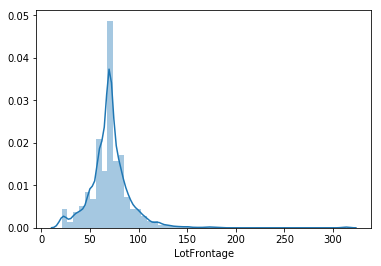

In [59]:
#LotFrontage: Linear feet of street connected to property
sns.distplot(data['LotFrontage'])
plt.show()

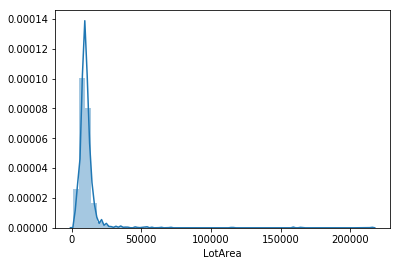

In [60]:
#LotArea: Lot size in square feet
sns.distplot(data['LotArea'])
plt.show()

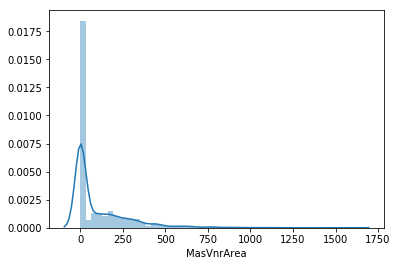

In [61]:
# MasVnrArea: Masonry veneer area in square feet
sns.distplot(data['MasVnrArea'])
plt.show()


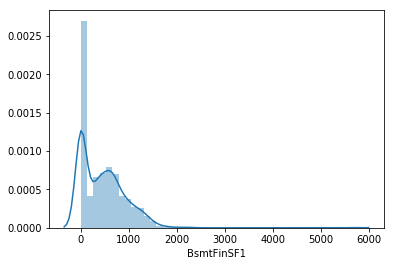

In [62]:
#BsmtFinSF1: Type 1 finished square feet
sns.distplot(data['BsmtFinSF1'])
plt.show()

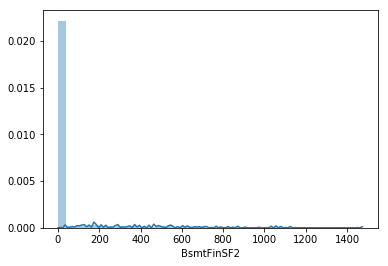

In [63]:
#BsmtFinSF2: Type 2 finished square feet
sns.distplot(data['BsmtFinSF2'])
plt.show()

### We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1459
Data columns (total 77 columns):
MSSubClass       1378 non-null int64
MSZoning         1378 non-null object
LotFrontage      1378 non-null float64
LotArea          1378 non-null int64
Street           1378 non-null object
LotShape         1378 non-null object
LandContour      1378 non-null object
Utilities        1378 non-null object
LotConfig        1378 non-null object
LandSlope        1378 non-null object
Neighborhood     1378 non-null object
Condition1       1378 non-null object
Condition2       1378 non-null object
BldgType         1378 non-null object
HouseStyle       1378 non-null object
OverallQual      1378 non-null int64
OverallCond      1378 non-null int64
YearBuilt        1378 non-null int64
YearRemodAdd     1378 non-null int64
RoofStyle        1378 non-null object
RoofMatl         1378 non-null object
Exterior1st      1378 non-null object
Exterior2nd      1378 non-null object
MasVnrType       1378 no

In [65]:
#Let's create derived variables i.e. property age when according to the year it was sold
data['property_age'] = data['YrSold'] - data['YearBuilt']
data['remodelling_age'] = data['YearRemodAdd'] - data['YearBuilt']

In [66]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea     Fence  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  GarageAge  property_age  remodelling_age
0          60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0  No fireplace     Attchd          RFn           2         548         TA         TA          Y           0           61              0          0            0         0  No fence        0       2    2008       WD        Normal     208500          5             5                0
1          20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1            TA     Attchd          RFn           2         460         TA         TA          Y         298            0              0          0            0         0  No fence        0       5    2007       WD        Normal     181500         31            31                0
2          60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1            TA     Attchd          RFn           2         608         TA         TA          Y           0           42              0          0            0         0  No fence        0       9    2008       WD        Normal     223500          7             7                1
3          70       RL         60.0     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540  

In [67]:
#Let's remove the unnecessary columns i.e. YearBuilt, YrSold, YearRemodAdd as the data from these has been already
# captured into the derived variables
data.drop(['YearBuilt', 'YrSold', 'YearRemodAdd' ], axis = 1, inplace = True)

In [68]:
data.shape

(1378, 76)

In [69]:
# all numeric (float and int) variables in the dataset
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  GarageAge  property_age  remodelling_age
0          60         65.0     8450            7            5       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0           2         548           0           61              0          0            0         0        0       2     208500          5             5                0
1          20         80.0     9600            6            8         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1           2         460         298            0              0          0            0         0        0       5     181500         31            31                0
2          60         68.0    11250            7            5       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1           2         608           0           42              0          0            0         0        0       9     223500          7             7                1
3          70         60.0     9550            7            5         0.0         216           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1           3         642           0           35            272          0            0         0        0       2     140000          8            91               55
4          60         84.0    14260            8            5       350.0         655           0        490         1145      1145      1053             0       2198             1             0         2         1             4             1             9           1           3         836         192           84              0          0            0         0        0      12     250000          8             8                0

In [70]:
#Let's remove the variables which are categorical althoug of int type
data_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold'], axis = 1, inplace = True)

In [71]:
data_numeric.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  GarageAge  property_age  remodelling_age
0         65.0     8450       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0           2         548           0           61              0          0            0         0        0     208500          5             5                0
1         80.0     9600         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1           2         460         298            0              0          0            0         0        0     181500         31            31                0
2         68.0    11250       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1           2         608           0           42              0          0            0         0        0     223500          7             7                1
3         60.0     9550         0.0         216           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1           3         642           0           35            272          0            0         0        0     140000          8            91               55
4         84.0    14260       350.0         655           0        490         1145      1145      1053             0       2198             1             0         2         1             4             1             9           1           3         836         192           84              0          0            0         0        0     250000          8             8                0

In [72]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1459
Data columns (total 32 columns):
LotFrontage        1378 non-null float64
LotArea            1378 non-null int64
MasVnrArea         1378 non-null float64
BsmtFinSF1         1378 non-null int64
BsmtFinSF2         1378 non-null int64
BsmtUnfSF          1378 non-null int64
TotalBsmtSF        1378 non-null int64
1stFlrSF           1378 non-null int64
2ndFlrSF           1378 non-null int64
LowQualFinSF       1378 non-null int64
GrLivArea          1378 non-null int64
BsmtFullBath       1378 non-null int64
BsmtHalfBath       1378 non-null int64
FullBath           1378 non-null int64
HalfBath           1378 non-null int64
BedroomAbvGr       1378 non-null int64
KitchenAbvGr       1378 non-null int64
TotRmsAbvGrd       1378 non-null int64
Fireplaces         1378 non-null int64
GarageCars         1378 non-null int64
GarageArea         1378 non-null int64
WoodDeckSF         1378 non-null int64
OpenPorchSF        1378 non-nul

In [73]:
data_numeric.shape

(1378, 32)

Let's now make a pairwise scatter plot and observe linear relationships.

<Figure size 1440x720 with 0 Axes>

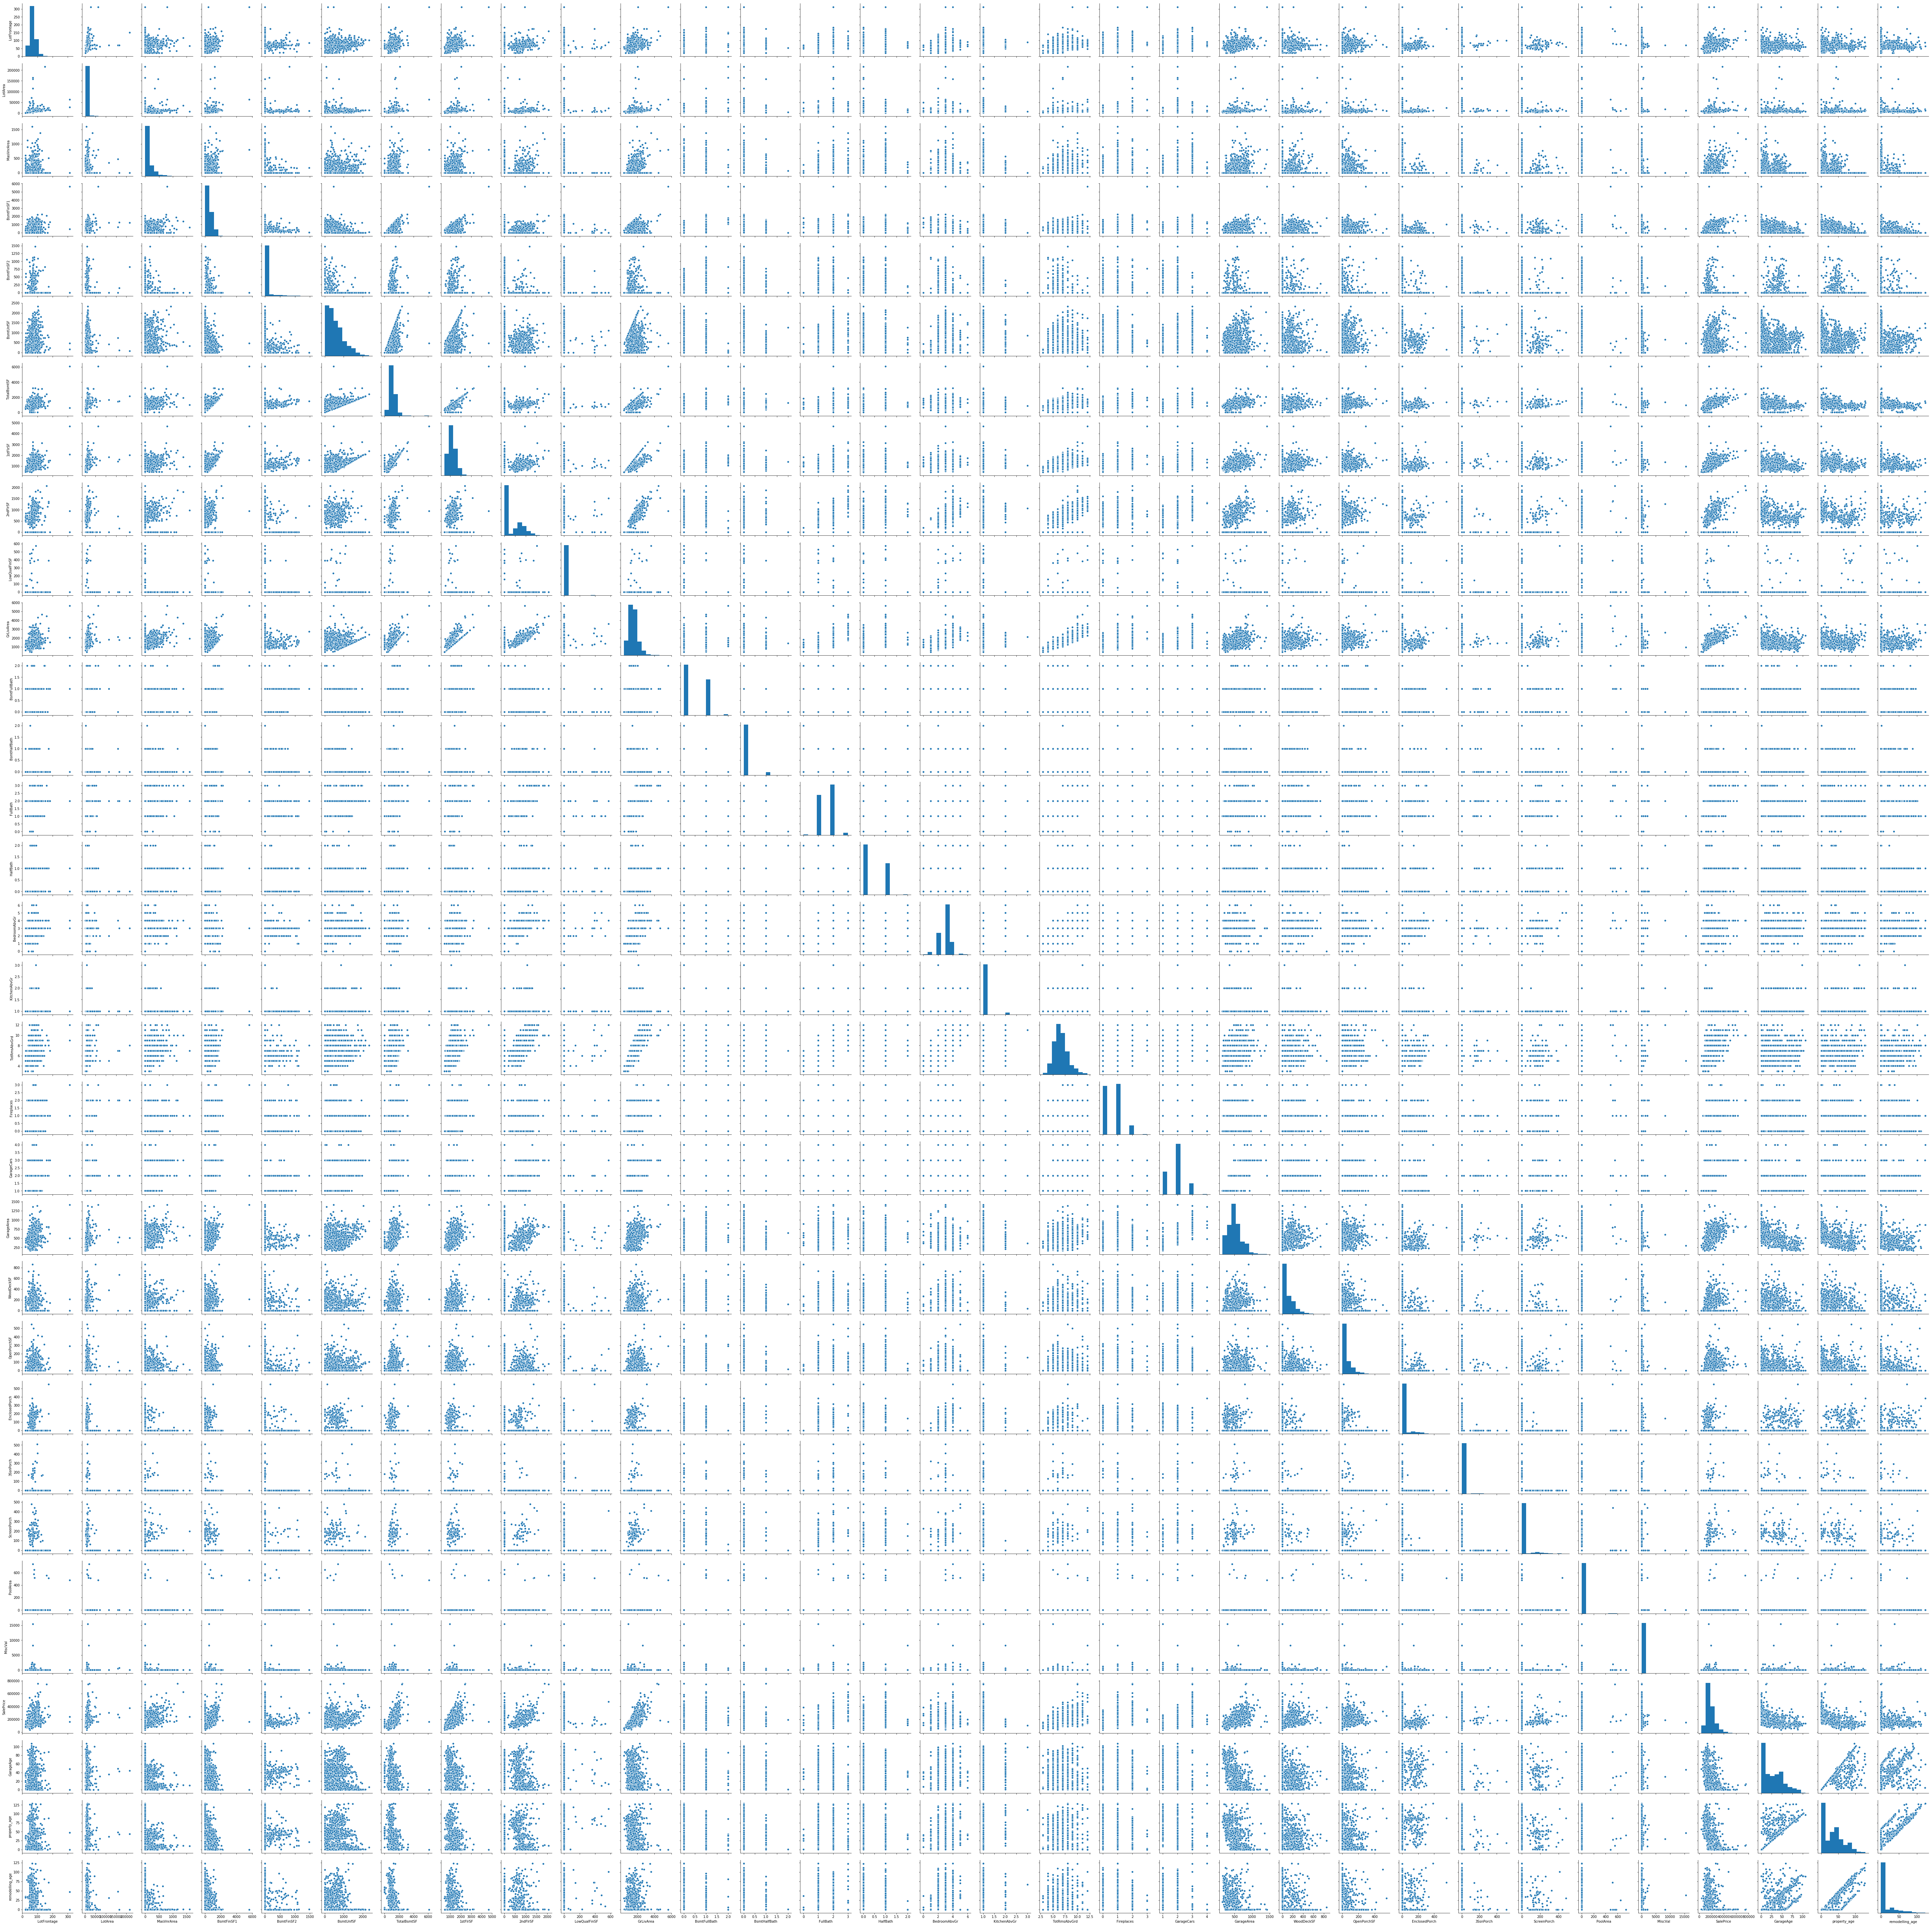

In [74]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

In [75]:
# correlation matrix
cor = data_numeric.corr()
cor

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  SalePrice  GarageAge  property_age  remodelling_age
LotFrontage         1.000000  0.301378    0.175378    0.220674    0.041894   0.109405     0.359716  0.408134  0.066632      0.010565   0.361363      0.104765     -0.000122  0.170418  0.039560      0.241068     -0.002993      0.315940    0.229426    0.270013    0.332633    0.071679     0.147018       0.013043   0.061618     0.032468  0.185247 -0.000509   0.329340  -0.065724     -0.103691        -0.060733
LotArea             0.301378  1.000000    0.095482    0.210153    0.109995  -0.009736     0.253055  0.291531  0.046305      0.010170   0.257232      0.161025      0.046464  0.117142  0.005785      0.119760     -0.012491      0.185749    0.265111    0.137994    0.167603    0.166602     0.085023      -0.013451   0.018435     0.038587  0.076863  0.040283   0.252911   0.024101      0.005215         0.009897
MasVnrArea          0.175378  0.095482    1.000000    0.253464   -0.077202   0.113111     0.353161  0.331846  0.173340     -0.060713   0.389342      0.082457      0.018241  0.269149  0.193879      0.108819     -0.019888      0.285566    0.233747    0.361472    0.366625    0.151321     0.126446      -0.104954   0.015874     0.054930  0.010001 -0.029279   0.463109  -0.249073     -0.298932        -0.227378
BsmtFinSF1          0.220674  0.210153    0.253464    1.000000   -0.055198  -0.503469     0.520886  0.446162 -0.142572     -0.050114   0.207901      0.647193      0.060697  0.044804 -0.006719     -0.117956     -0.065991      0.044609    0.253353    0.202219    0.288871    0.194813     0.119882      -0.097032   0.023826     0.056037  0.141615  0.006787   0.375540  -0.153250     -0.229525        -0.190128
BsmtFinSF2          0.041894  0.109995   -0.077202   -0.055198    1.000000  -0.214659     0.100284  0.093817 -0.106522      0.007432  -0.019694      0.159266      0.074098 -0.089382 -0.035345     -0.007698     -0.037852     -0.041098    0.039055   -0.075216   -0.047442    0.063263     0.004713       0.045316  -0.031469     0.087278  0.041456  0.006034  -0.023292   0.089441      0.067843         0.015725
BsmtUnfSF           0.109405 -0.009736    0.113111   -0.503469   -0.214659   1.000000     0.406030  0.311215 -0.006252     -0.000891   0.226551     -0.425774     -0.096374  0.295154 -0.052237      0.148740      0.018884      0.233131    0.047117    0.244345    0.200990   -0.005316     0.131642       0.001392   0.020300    -0.015219 -0.036552 -0.019086   0.213083  -0.193257     -0.159741        -0.033146
TotalBsmtSF         0.359716  0.253055    0.353161    0.520886    0.100284   0.406030     1.000000  0.822318 -0.196785     -0.050926   0.442249      0.308915     -0.006166  0.313886 -0.073561      0.024129     -0.064606      0.268763    0.329706    0.433440    0.491123    0.223772     0.262094      -0.083778   0.033910     0.076472  0.127694 -0.009994   0.603883  -0.324477     -0.378907        -0.228202
1stFlrSF            0.408134  0.291531    0.331846    0.446162    0.093817   0.311215     0.822318  1.000000 -0.223324     -0.018944   0.554661      0.250978     -0.000838  0.366897 -0.145093      0.105053      0.076740      0.396935    0.402102    0.440100    0.495158    0.226020     0.224390      -0.051625   0.053128     0.080796  0.132556 -0.015338   0.595024  -0.235106     -0.259678        -0.120205
2ndFlrSF            0.066632  0.046305    0.173340   -0.142572   -0.106522  -0.006252    -0.196785 -0.223324  1.000000      0.045603   0.683693     -0.173678     -0.021417  0.416839  0.616730      0.507577      0.039945      0.612196    0.193277    0.185838    0.128300    0.089896     0.204235       0.065034  -0.026601     0.037644  0.082294  0.012309 

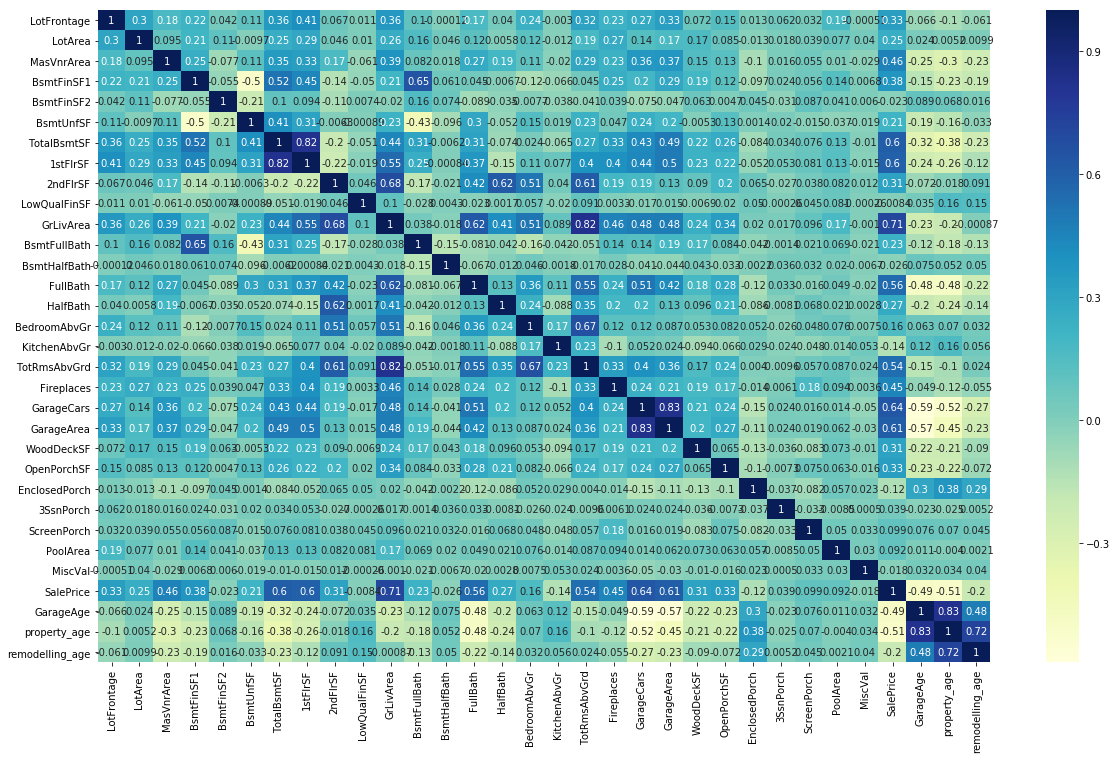

In [76]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,12))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


#### The heatmap shows some useful insights. The correlation with Sale Price can be seen as:
- property_age which is a derived variable has a negative correlation which is true that as the age gets higher, the sales price of the house is decreasing
- GarageAge also has negative correlation
- GarageArea is also having a good correlation i.e. 0.61 i.e. Higher the garage area, the greater the price
- GarageCars is also having a good correlation i.e. 0.64 i.e. Higher the number of cars which can be parked in the car, higher the price
- Also GarageArea & GarageCars should have high correlation logically which can be clearly seen from the heatmap i.e. 0.83
- Also, SalesPrice is having a high correlation with GrLivArea i.e. 0.71 which is logical greater the living area, greater the price

#### Let's convert some variables which are of int type to object to make them categorical

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass         1378 non-null int64
MSZoning           1378 non-null object
LotFrontage        1378 non-null float64
LotArea            1378 non-null int64
Street             1378 non-null object
LotShape           1378 non-null object
LandContour        1378 non-null object
Utilities          1378 non-null object
LotConfig          1378 non-null object
LandSlope          1378 non-null object
Neighborhood       1378 non-null object
Condition1         1378 non-null object
Condition2         1378 non-null object
BldgType           1378 non-null object
HouseStyle         1378 non-null object
OverallQual        1378 non-null int64
OverallCond        1378 non-null int64
RoofStyle          1378 non-null object
RoofMatl           1378 non-null object
Exterior1st        1378 non-null object
Exterior2nd        1378 non-null object
MasVnrType         1378 non-null object
MasVnrArea      

In [78]:
# Converting columns containing int values to categorical variables
data[['MSSubClass', 'MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']] = data[['MSSubClass', 'MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']].astype('object')

In [79]:
#Verifying the conversion
data[['MSSubClass', 'MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1459
Data columns (total 5 columns):
MSSubClass     1378 non-null object
MSSubClass     1378 non-null object
OverallQual    1378 non-null object
OverallCond    1378 non-null object
MoSold         1378 non-null object
dtypes: object(5)
memory usage: 104.6+ KB


In [80]:
# Checking for outliers
data.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,0.95])

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice    GarageAge  property_age  remodelling_age
count  1378.000000    1378.000000  1378.000000  1378.000000  1378.000000  1378.000000  1378.000000  1378.000000  1378.000000   1378.000000  1378.000000   1378.000000   1378.000000  1378.000000  1378.000000   1378.000000   1378.000000   1378.000000  1378.000000  1378.000000  1378.000000  1378.000000  1378.000000    1378.000000  1378.000000  1378.000000  1378.000000   1378.000000    1378.000000  1378.000000   1378.000000      1378.000000
mean     70.565747   10696.509434   108.443396   455.909289    48.137155   570.900581  1074.947025  1177.436865   353.216981      4.137881  1534.791727      0.431060      0.058781     1.579826     0.395501      2.865022      1.038462      6.552250     0.642235     1.870827   500.835269    97.455007    47.310595      21.054427     3.612482    15.957184     2.923077     42.920174  185492.558781    29.326560     34.877358        12.484761
std      21.940511   10218.377673   184.238932   459.694234   164.379207   443.810361   436.133293   386.987388   439.644876     40.144961   519.315134      0.514108      0.238366     0.548133     0.502320      0.784237      0.196116      1.590353     0.645988     0.630274   185.728067   126.745170    65.221688      60.554428    30.165473    57.268764    41.350477    501.794706   79051.093697    24.724084     29.416379        23.215735
min      21.000000    1300.000000     0.000000     0.000000     0.000000     0.000000     0.000000   438.000000     0.000000      0.000000   438.000000      0.000000      0.000000     0.000000     0.000000      0.000000      1.000000      3.000000     0.000000     1.000000   160.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000   35311.000000     0.000000      0.000000         0.000000
25%      60.000000    7740.500000     0.000000     0.000000     0.000000   227.500000   810.250000   894.000000     0.000000      0.000000  1154.000000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000     1.000000   380.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000  134000.000000     6.000000      7.000000         0.000000
50%      70.050000    9591.000000     0.000000   400.000000     0.000000   477.500000  1008.000000  1098.500000     0.000000      0.000000  1479.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000     2.000000   484.000000     0.000000    27.500000       0.000000     0.000000     0.000000     0.000000      0.000000  167700.000000    28.000000     33.000000         0.000000
75%      79.000000   11712.750000   170.750000   732.000000     0.000000   811.000000  1314.000000  1414.000000   738.750000      0.000000  1790.000000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000     2.000000   581.000000   171.000000    69.750000       0.000000     0.000000     0.000000     0.000000      0.000000  217875.000000    47.000000     53.000000        17.000000
85%      85.000000   13354.500000   270.900000   936.900000     0.000000  1033.350000  1494.900000  1580.900000   871.450000      0.000000  2007.450000      1.000000      0.000000     2.000000     1.000000      4.000000      1.000000      8.000000     1.000000     2.000000   675.450000   220.900000   105.000000       0.000000     0.000000     0.000000     0.000000      0.000000  255225.000000    55.000000     68.000000        35.000000
90%      92.300000   14575.900000   338.600000 

In [81]:
# Clearly 'LotArea' is having outliers which needs to be handled, others include 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal'
lot_area_limiter = data["LotArea"].quantile(0.98)

In [82]:
data_outlier_removed = data.loc[data['LotArea'] <= lot_area_limiter]

In [83]:
# Checking for outliers on the new dataset
data_outlier_removed.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,0.95,0.99])

LotFrontage       LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice    GarageAge  property_age  remodelling_age
count  1350.000000   1350.000000  1350.000000  1350.000000  1350.000000  1350.000000  1350.000000  1350.000000  1350.000000   1350.000000  1350.000000   1350.000000   1350.000000  1350.000000  1350.000000   1350.000000   1350.000000   1350.000000  1350.000000  1350.000000  1350.000000  1350.000000  1350.000000    1350.000000  1350.000000  1350.000000  1350.000000   1350.000000    1350.000000  1350.000000   1350.000000      1350.000000
mean     69.993333   9710.668148   105.892593   442.016296    46.548889   574.986667  1063.551852  1165.982963   350.242963      3.933333  1520.159259      0.420741      0.057037     1.574815     0.395556      2.859259      1.038519      6.530370     0.626667     1.862963   497.688148    94.118519    46.611111      20.897037     3.687407    15.641481     2.248889     42.921481  183855.794074    29.166667     34.795556        12.423704
std      19.520029   3722.413845   178.772844   430.869066   160.820907   445.391419   409.097392   368.244464   435.036088     39.155674   493.673709      0.507190      0.235173     0.541765     0.502605      0.779300      0.196328      1.571676     0.633767     0.628958   182.336791   121.860792    64.014030      59.172441    30.472388    56.734987    37.200819    506.471956   77380.623353    24.737398     29.524193        23.184496
min      21.000000   1300.000000     0.000000     0.000000     0.000000     0.000000     0.000000   438.000000     0.000000      0.000000   438.000000      0.000000      0.000000     0.000000     0.000000      0.000000      1.000000      3.000000     0.000000     1.000000   160.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000   35311.000000     0.000000      0.000000         0.000000
25%      60.000000   7662.750000     0.000000     0.000000     0.000000   231.000000   806.250000   894.000000     0.000000      0.000000  1146.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000     1.000000   372.250000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000  133000.000000     6.000000      7.000000         0.000000
50%      70.050000   9528.000000     0.000000   390.000000     0.000000   483.500000  1002.500000  1095.000000     0.000000      0.000000  1472.500000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000     2.000000   484.000000     0.000000    27.000000       0.000000     0.000000     0.000000     0.000000      0.000000  165550.000000    28.000000     33.000000         0.000000
75%      79.000000  11522.500000   170.000000   715.500000     0.000000   813.000000  1302.000000  1392.000000   729.750000      0.000000  1776.000000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000     2.000000   577.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000  215000.000000    47.000000     53.000000        17.000000
85%      85.000000  12978.400000   268.000000   919.650000     0.000000  1046.950000  1484.650000  1567.000000   866.000000      0.000000  1984.950000      1.000000      0.000000     2.000000     1.000000      4.000000      1.000000      8.000000     1.000000     2.000000   672.000000   216.000000   105.000000       0.000000     0.000000     0.000000     0.000000      0.000000  252887.300000    55.000000     68.650000        35.000000
90%      92.000000  14058.600000   336.000000  1056.3000

In [84]:
# % of data remaining after outlier removal
len(data_outlier_removed)/len(data)*100

97.96806966618288

In [85]:
#As seen from the above outlier analysis, MiscVal is an outlier, let's handle that
misc_val_limiter = data_outlier_removed["MiscVal"].quantile(0.99)

In [86]:
data_outlier_removed = data_outlier_removed.loc[data_outlier_removed['MiscVal'] <= misc_val_limiter]

In [87]:
#As we see, we still have 97% of the data that was prepared after the null values imputation
len(data_outlier_removed)/len(data)

0.9702467343976778

In [88]:
# Checking for outliers again
data_outlier_removed.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,0.95,0.99])

LotFrontage       LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea      MiscVal      SalePrice    GarageAge  property_age  remodelling_age
count  1337.000000   1337.000000  1337.000000  1337.000000  1337.000000  1337.000000  1337.000000  1337.000000  1337.000000   1337.000000  1337.000000   1337.000000   1337.000000  1337.000000  1337.000000   1337.000000   1337.000000   1337.000000  1337.000000  1337.000000  1337.000000  1337.000000  1337.000000    1337.000000  1337.000000  1337.000000  1337.000000  1337.000000    1337.000000  1337.000000   1337.000000      1337.000000
mean     70.001346   9689.154076   106.373224   441.400150    46.358265   576.225879  1063.984293  1166.179506   348.242334      3.971578  1518.393418      0.420344      0.057592     1.574420     0.397158      2.853403      1.038145      6.522064     0.623785     1.866118   498.140613    94.357517    46.442782      20.728497     3.723261    14.764398     1.882573    12.411369  183884.085266    29.074046     34.582648        12.245325
std      19.605018   3721.286097   179.100478   431.416983   161.032976   446.270847   408.981588   368.841240   433.510496     39.343784   491.177120      0.507258      0.236247     0.540878     0.501576      0.775402      0.195485      1.561513     0.630894     0.629273   182.703589   121.942324    62.730437      59.025510    30.618104    53.653278    34.602215    79.461896   77545.113167    24.719015     29.489178        23.071348
min      21.000000   1300.000000     0.000000     0.000000     0.000000     0.000000     0.000000   438.000000     0.000000      0.000000   438.000000      0.000000      0.000000     0.000000     0.000000      0.000000      1.000000      3.000000     0.000000     1.000000   160.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000     0.000000   35311.000000     0.000000      0.000000         0.000000
25%      60.000000   7599.000000     0.000000     0.000000     0.000000   235.000000   807.000000   894.000000     0.000000      0.000000  1146.000000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000     1.000000   373.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000     0.000000  133000.000000     6.000000      7.000000         0.000000
50%      70.050000   9520.000000     0.000000   387.000000     0.000000   484.000000  1002.000000  1095.000000     0.000000      0.000000  1472.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000     2.000000   484.000000     0.000000    27.000000       0.000000     0.000000     0.000000     0.000000     0.000000  166000.000000    27.000000     32.000000         0.000000
75%      79.000000  11500.000000   170.000000   716.000000     0.000000   814.000000  1302.000000  1392.000000   729.000000      0.000000  1776.000000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000     2.000000   578.000000   168.000000    69.000000       0.000000     0.000000     0.000000     0.000000     0.000000  215000.000000    47.000000     53.000000        15.000000
85%      85.000000  12955.200000   268.000000   921.200000     0.000000  1051.800000  1484.600000  1567.000000   865.200000      0.000000  1981.600000      1.000000      0.000000     2.000000     1.000000      4.000000      1.000000      8.000000     1.000000     2.000000   672.000000   216.000000   105.000000       0.000000     0.000000     0.000000     0.000000     0.000000  252406.800000    55.000000     68.000000        34.000000
90%      92.000000  14002.400000   336.000000  1057.200000   112.

In [89]:
#As seen from the above outlier analysis, PoolArea is an outlier, let's handle that
PoolArea_limiter = data_outlier_removed["PoolArea"].quantile(0.99)

In [90]:
data_outlier_removed = data_outlier_removed.loc[data_outlier_removed['PoolArea'] <= PoolArea_limiter]

In [91]:
#As we see, we still have 96% of the data that was prepared after the null values imputation
len(data_outlier_removed)/len(data)

0.967343976777939

In [92]:
# Checking for outliers again
data_outlier_removed.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,0.95,0.99])

LotFrontage       LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  PoolArea      MiscVal     SalePrice    GarageAge  property_age  remodelling_age
count  1333.000000   1333.000000  1333.000000  1333.000000  1333.000000  1333.000000  1333.000000  1333.000000  1333.000000   1333.000000  1333.000000   1333.000000   1333.000000  1333.000000  1333.000000   1333.000000   1333.000000    1333.00000  1333.000000  1333.000000  1333.000000  1333.000000  1333.000000    1333.000000  1333.000000  1333.000000    1333.0  1333.000000    1333.00000  1333.000000   1333.000000      1333.000000
mean     69.923293   9676.718680   106.618155   440.263316    46.214554   576.776444  1063.254314  1164.867967   347.268567      3.983496  1516.120030      0.419355      0.057764     1.573893     0.396849      2.851463      1.038260       6.51988     0.621905     1.865716   498.069767    93.721680    46.346587      20.790698     3.734434    14.808702       0.0    12.448612  183406.64066    29.075769     34.600900        12.263316
std      19.476881   3713.179084   179.297860   429.458838   161.004832   446.584732   407.839875   367.620456   431.325971     39.402211   484.669009      0.507142      0.236580     0.539694     0.501549      0.775270      0.195767       1.55980     0.630458     0.628982   182.724473   121.233586    62.577579      59.103123    30.663361    53.727668       0.0    79.578204   76081.14080    24.749152     29.525727        23.096003
min      21.000000   1300.000000     0.000000     0.000000     0.000000     0.000000     0.000000   438.000000     0.000000      0.000000   438.000000      0.000000      0.000000     0.000000     0.000000      0.000000      1.000000       3.00000     0.000000     1.000000   160.000000     0.000000     0.000000       0.000000     0.000000     0.000000       0.0     0.000000   35311.00000     0.000000      0.000000         0.000000
25%      60.000000   7596.000000     0.000000     0.000000     0.000000   235.000000   807.000000   893.000000     0.000000      0.000000  1146.000000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000       5.00000     0.000000     1.000000   373.000000     0.000000     0.000000       0.000000     0.000000     0.000000       0.0     0.000000  133000.00000     6.000000      6.000000         0.000000
50%      70.050000   9503.000000     0.000000   387.000000     0.000000   484.000000  1001.000000  1094.000000     0.000000      0.000000  1472.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000       6.00000     1.000000     2.000000   484.000000     0.000000    27.000000       0.000000     0.000000     0.000000       0.0     0.000000  165500.00000    27.000000     32.000000         0.000000
75%      79.000000  11500.000000   170.000000   716.000000     0.000000   815.000000  1302.000000  1392.000000   729.000000      0.000000  1776.000000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000       7.00000     1.000000     2.000000   578.000000   168.000000    68.000000       0.000000     0.000000     0.000000       0.0     0.000000  215000.00000    47.000000     53.000000        15.000000
85%      85.000000  12927.200000   268.400000   920.400000     0.000000  1053.400000  1484.200000  1566.200000   864.400000      0.000000  1980.200000      1.000000      0.000000     2.000000     1.000000      4.000000      1.000000       8.00000     1.000000     2.000000   672.000000   216.000000   105.000000       0.000000     0.000000     0.000000       0.0     0.000000  251200.00000    55.000000     68.000000        34.200000
90%      92.000000  13978.200000   336.000000  1056.000000   109.600000  1256.000000  1602.000000  16

In [93]:
data_outlier_removed.shape

(1333, 76)

## Model Building

In [94]:
# split into X and y
X = data_outlier_removed.loc[:, data_outlier_removed.columns != 'SalePrice']

y = data_outlier_removed['SalePrice']


In [95]:
#Let's check the derived datasets
print(X.shape)
print(y.shape)
X.info()

(1333, 75)
(1333,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass         1333 non-null object
MSZoning           1333 non-null object
LotFrontage        1333 non-null float64
LotArea            1333 non-null int64
Street             1333 non-null object
LotShape           1333 non-null object
LandContour        1333 non-null object
Utilities          1333 non-null object
LotConfig          1333 non-null object
LandSlope          1333 non-null object
Neighborhood       1333 non-null object
Condition1         1333 non-null object
Condition2         1333 non-null object
BldgType           1333 non-null object
HouseStyle         1333 non-null object
OverallQual        1333 non-null object
OverallCond        1333 non-null object
RoofStyle          1333 non-null object
RoofMatl           1333 non-null object
Exterior1st        1333 non-null object
Exterior2nd        1333 non-null object
MasVnrType         1333 non-null o

As we see, we have got exactly 75 columns except the 'SalePrice', let's proceed further

In [96]:
# creating dummy variables for categorical variables

# subset all categorical variables
data_categorical = X.select_dtypes(include=['object'])
data_categorical.head()


MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional   FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive     Fence MoSold SaleType SaleCondition
0         60       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ  No fireplace     Attchd          RFn         TA         TA          Y  No fence      2       WD        Normal
1         20       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story           6           8     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ            TA     Attchd          RFn         TA         TA          Y  No fence      5       WD        Normal
2         60       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ            TA     Attchd          RFn         TA         TA          Y  No fence      9       WD        Normal
3         70       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story           7           5     Gable  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf    GasA        Gd          Y      SBrkr          Gd        Typ            Gd     Detchd          Unf         TA         TA          Y  No fence      2       WD       Abnorml
4         60       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story           8           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ            TA     Attchd          RFn         TA         TA          Y  No fence     12       WD        Normal

In [97]:
# convert into dummies
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0   
1              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0   
2              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0   
3              0              0              0 

In [98]:
# drop categorical variables 
X = X.drop(list(data_categorical.columns), axis=1)

In [99]:
# concat dummy variables with X
X = pd.concat([X, data_dummies], axis=1)

In [100]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=276)

In [101]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Ridge Regression

In [102]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [103]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1400]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.010971      0.001261         0.000598        0.000488      0.0001  {'alpha': 0.0001}      -16762.952645      -18469.480781      -17641.757492      -18265.372051      -18704.098798    -17967.626237      698.882055               28       -10646.010118       -10257.874666       -10789.958130       -10298.067339       -10077.884964     -10413.959043       263.044491
1       0.008765      0.001841         0.000797        0.000398       0.001   {'alpha': 0.001}      -16762.514430      -18468.654874      -17641.384702      -18264.237202      -18702.986486    -17966.850166      698.619387               27       -10645.996433       -10257.853520       -10789.963765       -10298.059669       -10077.900622     -10413.954802       263.042872
2       0.007189      0.000744         0.000591        0.000483        0.01    {'alpha': 0.01}      -16758.166172      -18460.433129      -17637.665883      -18253.024900      -18692.229532    -17959.205695      696.076635               26       -10645.861110       -10257.642837       -10790.040118       -10297.984594       -10078.052333     -10413.916198       263.033717
3       0.007381      0.000486         0.000399        0.000488        0.05    {'alpha': 0.05}      -16739.545100      -18424.690738      -17621.334112      -18205.954327      -18651.282937    -17927.489509      686.351778               25       -10645.290896       -10256.722405       -10790.379430       -10297.683379       -10078.657408     -10413.746704       263.012199
4       0.007372      0.000787         0.000398        0.000487         0.1     {'alpha': 0.1}      -16717.846383      -18381.753008      -17601.355850      -18152.566932      -18612.262719    -17892.108194      676.964742               24       -10644.640504       -10255.603675       -10790.786815       -10297.499293       -10079.375196     -10413.581097       262.982143

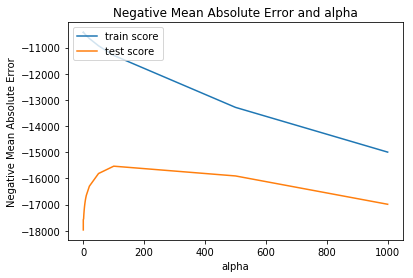

In [104]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [105]:
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.93921742e+03,  3.75542120e+03,  4.12365130e+03,  5.15389422e+03,
        6.40329291e+02,  2.43977218e+02,  5.94703505e+03,  6.19538769e+03,
        3.65109290e+03, -5.16658857e+02,  7.90643689e+03,  1.44386383e+03,
        2.28617262e+02,  2.74351313e+03,  2.42521449e+03, -4.75455253e+02,
       -1.80974121e+03,  3.64720793e+03,  2.59307158e+03,  3.30487736e+03,
        4.20295241e+03,  1.70500922e+03,  1.81852704e+03,  3.56557152e+02,
        5.16932480e+02,  1.12250909e+03,  0.00000000e+00,  3.36261090e+01,
       -1.26601847e+03, -2.38081124e+03,  8.81359502e+02, -8.97041047e+02,
        2.23799724e+02,  7.98633520e+01,  3.60410159e+02,  1.48103214e+03,
        5.33711541e+02, -8.45588097e+01, -5.29899127e+02, -4.66930574e+02,
       -1.09214640e+03, -8.57178393e+02, -9.42226594e+02, -5.10637207e+02,
       -6.64521262e+02,  1.01401512e+03, -1.52382692e+02,  8.41757094e+02,
       -9.16415960e+02,  2.67933257e+02,  2.78094764e+02, -4.46086473e+01,
       -6.32260303e+02,  

In [106]:
# predict prices of X_test
y_pred_test = ridge.predict(X_test)
y_pred_train=ridge.predict(X_train)

In [107]:
# evaluate the model on test set
from sklearn.metrics import r2_score
r_square = r2_score(y_test, y_pred_test)
print("R Square Value : {}".format(r_square))

R Square Value : 0.8942144845140625


In [108]:
# evaluate the model on train set
from sklearn.metrics import r2_score
r_square = r2_score(y_train, y_pred_train)
print("R Square Value : {}".format(r_square))

R Square Value : 0.925094463794158


#### As seen above, the R-square value on the test set came out to be 0.89 & on the train set it comes out to be 0.92 i.e. difference of 0.3 which seems the model is doing good on the test set i.e. not much overfitting is seen

## Lasso

In [109]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   16.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [110]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1400]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.120882      0.002404         0.000000        0.000000      0.0001  {'alpha': 0.0001}      -16747.166832      -18465.996564      -17764.955989      -18352.110882      -18730.512594    -18011.014246      707.226633               28       -10645.513990       -10257.145748       -10789.554477       -10296.932732       -10081.576466     -10414.144683       262.088991
1       0.126583      0.005729         0.000798        0.000399       0.001   {'alpha': 0.001}      -16747.107908      -18465.858807      -17764.587825      -18351.487267      -18730.011836    -18010.676883      707.094145               27       -10645.510992       -10257.142504       -10789.555231       -10296.930993       -10081.574214     -10414.142787       262.089793
2       0.140471      0.018199         0.000599        0.000489        0.01    {'alpha': 0.01}      -16746.518658      -18464.485675      -17760.906205      -18347.098269      -18725.004534    -18007.672446      705.948767               26       -10645.485949       -10257.109637       -10789.569942       -10296.918024       -10081.556055     -10414.127921       262.099293
3       0.154131      0.020564         0.000797        0.000399        0.05    {'alpha': 0.05}      -16743.901444      -18458.321089      -17744.544387      -18323.298345      -18708.668613    -17994.631584      701.670825               25       -10645.409929       -10256.988840       -10789.675203       -10296.915795       -10081.556685     -10414.109291       262.130550
4       0.146110      0.025834         0.000200        0.000400         0.1     {'alpha': 0.1}      -16740.637639      -18450.574596      -17724.096216      -18288.808536      -18700.158671    -17979.754106      698.408282               24       -10645.347251       -10256.872595       -10789.812789       -10296.915493       -10081.619875     -10414.113601       262.156857

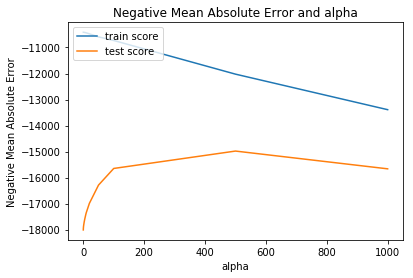

In [111]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [112]:
alpha = 500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [113]:
lasso.coef_

array([ 6.20417150e+02,  5.04251111e+03,  2.77908545e+03,  7.29860517e+03,
        5.47668254e+02, -0.00000000e+00,  7.76325033e+03,  0.00000000e+00,
        0.00000000e+00, -4.61288380e+02,  2.65253444e+04,  3.88412438e+02,
       -0.00000000e+00,  0.00000000e+00,  1.44016492e+03, -1.28977310e+03,
       -3.97480785e+03,  0.00000000e+00,  1.48148481e+03,  2.14288261e+03,
        4.07841323e+03,  1.08934721e+03,  7.71956157e+02,  0.00000000e+00,
        1.26286468e+02,  7.66854206e+02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.14133359e+04,  1.49658065e+03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -8.62938937e+02, -0.00000000e+00, -3.00504274e+02, -1.29257091e+02,
       -7.42222960e+00,  9.38168154e+02, -0.00000000e+00,  0.00000000e+00,
       -6.20999342e+02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [114]:
# # lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
ls = list(zip(cols, model_parameters))
ls

[('constant', 183804.487),
 ('LotFrontage', 620.417),
 ('LotArea', 5042.511),
 ('MasVnrArea', 2779.085),
 ('BsmtFinSF1', 7298.605),
 ('BsmtFinSF2', 547.668),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 7763.25),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -461.288),
 ('GrLivArea', 26525.344),
 ('BsmtFullBath', 388.412),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.0),
 ('HalfBath', 1440.165),
 ('BedroomAbvGr', -1289.773),
 ('KitchenAbvGr', -3974.808),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 1481.485),
 ('GarageCars', 2142.883),
 ('GarageArea', 4078.413),
 ('WoodDeckSF', 1089.347),
 ('OpenPorchSF', 771.956),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 126.286),
 ('ScreenPorch', 766.854),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('GarageAge', -0.0),
 ('property_age', -11413.336),
 ('remodelling_age', 1496.581),
 ('MSSubClass_30', -0.0),
 ('MSSubClass_40', -0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', 0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', -0.0),
 

In [115]:
features = pd.DataFrame(ls, columns =['featureName','coeffiecient'])

In [116]:
features

featureName  coeffiecient
0                    constant    183804.487
1                 LotFrontage       620.417
2                     LotArea      5042.511
3                  MasVnrArea      2779.085
4                  BsmtFinSF1      7298.605
5                  BsmtFinSF2       547.668
6                   BsmtUnfSF        -0.000
7                 TotalBsmtSF      7763.250
8                    1stFlrSF         0.000
9                    2ndFlrSF         0.000
10               LowQualFinSF      -461.288
11                  GrLivArea     26525.344
12               BsmtFullBath       388.412
13               BsmtHalfBath        -0.000
14                   FullBath         0.000
15                   HalfBath      1440.165
16               BedroomAbvGr     -1289.773
17               KitchenAbvGr     -3974.808
18               TotRmsAbvGrd         0.000
19                 Fireplaces      1481.485
20                 GarageCars      2142.883
21                 GarageArea      4078.413
22                 WoodDeckSF      1089.347
23                OpenPorchSF       771.956
24              EnclosedPorch         0.000
25                  3SsnPorch       126.286
26                ScreenPorch       766.854
27                   PoolArea         0.000
28                    MiscVal         0.000
29                  GarageAge        -0.000
30               property_age    -11413.336
31            remodelling_age      1496.581
32              MSSubClass_30        -0.000
33              MSSubClass_40        -0.000
34              MSSubClass_45         0.000
35              MSSubClass_50         0.000
36              MSSubClass_60         0.000
37              MSSubClass_70         0.000
38              MSSubClass_75        -0.000
39              MSSubClass_80        -0.000
40              MSSubClass_85         0.000
41              MSSubClass_90      -862.939
42             MSSubClass_120        -0.000
43             MSSubClass_160      -300.504
44             MSSubClass_180      -129.257
45             MSSubClass_190        -7.422
46                MSZoning_FV       938.168
47                MSZoning_RH        -0.000
48                MSZoning_RL         0.000
49                MSZoning_RM      -620.999
50                Street_Pave         0.000
51               LotShape_IR2         0.000
52               LotShape_IR3        -0.000
53               LotShape_Reg        -0.000
54            LandContour_HLS         0.000
55            LandContour_Low      -301.629
56            LandContour_Lvl         0.000
57           Utilities_NoSeWa         0.000
58          LotConfig_CulDSac      1329.627
59              LotConfig_FR2      -203.317
60              LotConfig_FR3      -123.658
61           LotConfig_Inside         0.000
62              LandSlope_Mod         0.000
63              LandSlope_Sev     -3430.369
64       Neighborhood_Blueste        -0.000
65        Neighborhood_BrDale         0.000
66       Neighborhood_BrkSide      1121.201
67       Neighborhood_ClearCr         0.000
68       Neighborhood_CollgCr        -0.000
69       Neighborhood_Crawfor      4865.672
70       Neighborhood_Edwards      -819.895
71       Neighborhood_Gilbert        -0.000
72        Neighborhood_IDOTRR        -0.000
73       Neighborhood_MeadowV      -665.840
74       Neighborhood_Mitchel        -0.000
75         Neighborhood_NAmes      -953.597
76       Neighborhood_NPkVill       108.509
77        Neighborhood_NWAmes      -992.388
78       Neighborhood_NoRidge      2324.789
79       Neighborhood_NridgHt      2924.030
80       Neighborhood_OldTown        -0.000
81         Neighborhood_SWISU        -0.000
82        Neighborhood_Sawyer        -0.000
83       Neighborhood_SawyerW       253.217
84       Neighborhood_Somerst         0.000
85       Neighborhood_StoneBr      3469.648
86        Neighborhood_Timber      -591.015
87       Neighborhood_Veenker       461.750
88           Condition1_Feedr        -0.000
89            Condition1_Norm      2267.436
90            

In [117]:
#Filtering features whose coefficients are non-zero
features = features.loc[features['coeffiecient'] !=0 ]

In [118]:
features.sort_values(by=['coeffiecient'],ascending = False)

featureName  coeffiecient
0                 constant    183804.487
11               GrLivArea     26525.344
119          OverallQual_9     10993.101
137       RoofMatl_WdShngl     10572.289
118          OverallQual_8      8356.798
7              TotalBsmtSF      7763.250
4               BsmtFinSF1      7298.605
120         OverallQual_10      6467.337
269           SaleType_New      6358.316
2                  LotArea      5042.511
69    Neighborhood_Crawfor      4865.672
21              GarageArea      4078.413
188        BsmtExposure_Gd      3779.457
85    Neighborhood_StoneBr      3469.648
226         Functional_Typ      3201.125
79    Neighborhood_NridgHt      2924.030
3               MasVnrArea      2779.085
139    Exterior1st_BrkFace      2697.364
78    Neighborhood_NoRidge      2324.789
89         Condition1_Norm      2267.436
20              GarageCars      2142.883
117          OverallQual_7      2127.839
193       BsmtFinType1_GLQ      2013.808
125          OverallCond_7      1992.586
31         remodelling_age      1496.581
127          OverallCond_9      1488.233
19              Fireplaces      1481.485
276  SaleCondition_Partial      1477.084
275   SaleCondition_Normal      1442.444
15                HalfBath      1440.165
58       LotConfig_CulDSac      1329.627
133         RoofMatl_Metal      1203.012
126          OverallCond_8      1156.713
168       MasVnrType_Stone      1154.668
176       Foundation_PConc      1127.798
66    Neighborhood_BrkSide      1121.201
22              WoodDeckSF      1089.347
46             MSZoning_FV       938.168
23             OpenPorchSF       771.956
26             ScreenPorch       766.854
177        Foundation_Slab       728.487
1              LotFrontage       620.417
5               BsmtFinSF2       547.668
234     GarageType_BuiltIn       519.009
265           SaleType_Con       475.447
87    Neighborhood_Veenker       461.750
256               MoSold_5       454.701
240          GarageQual_Gd       437.766
12            BsmtFullBath       388.412
162     Exterior2nd_Stucco       335.688
228         FireplaceQu_Gd       335.278
178       Foundation_Stone       314.050
106      HouseStyle_1.5Unf       276.693
83    Neighborhood_SawyerW       253.217
273   SaleCondition_Alloca       213.791
187            BsmtCond_TA       200.287
213           CentralAir_Y       147.655
199       BsmtFinType2_GLQ       145.506
272  SaleCondition_AdjLand       144.987
25               3SsnPorch       126.286
264           SaleType_CWD       123.822
76    Neighborhood_NPkVill       108.509
164    Exterior2nd_Wd Sdng       101.509
163    Exterior2nd_VinylSd        13.393
93         Condition1_RRAn         0.290
154     Exterior2nd_CBlock        -0.866
146      Exterior1st_Stone        -5.244
216         Electrical_Mix        -6.862
45          MSSubClass_190        -7.422
136       RoofMatl_WdShake       -64.930
186            BsmtCond_Po       -67.114
140     Exterior1st_CBlock       -95.641
218         KitchenQual_Fa      -105.313
108      HouseStyle_2.5Fin      -110.853
60           LotConfig_FR3      -123.658
247           PavedDrive_P      -123.888
44          MSSubClass_180      -129.257
210           HeatingQC_Gd      -140.864
114          OverallQual_4      -156.562
263              MoSold_12      -183.904
59           LotConfig_FR2      -203.317
189        BsmtExposure_Mn      -227.204
103        BldgType_Duplex      -237.891
196       BsmtFinType1_Rec      -241.214
99         Condition2_PosN      -276.148
253               MoSold_2      -295.148
43          MSSubClass_160      -300.504
55         LandContour_Low      -301.629
207           Heating_OthW      -380.656
235     GarageType_CarPort      -382.757
165    Exterior2nd_Wd Shng      -401.462
173           ExterCond_Gd      -403.345
109      HouseStyle_2.5Unf      -423.340
10            LowQualFinSF      -461.288
241          GarageQual_Po      -461.895
212           HeatingQC_TA      -525.495
86     Neighborhood_Timber      -591.0

In [119]:
# predict prices of X_test
y_pred_test = lasso.predict(X_test)
y_pred_train=lasso.predict(X_train)

In [120]:
# evaluate the model on test set
from sklearn.metrics import r2_score
r_square = r2_score(y_test, y_pred_test)
print("R Square Value : {}".format(r_square))

R Square Value : 0.8820399809987833


In [121]:
# evaluate the model on train set
from sklearn.metrics import r2_score
r_square = r2_score(y_train, y_pred_train)
print("R Square Value : {}".format(r_square))

R Square Value : 0.9395230512879055


#### As seen above, the R-square value on the test set came out to be 0.88 & on the train set it comes out to be 0.93 i.e. difference of 0.6 which seems the model is doing good on the test set i.e. not so much overfitting is seen

##### Now comes the important features which the company should consider for evaluating of Housing prices
As seen from the Lasso Regression we have filtered out the parameters whose coefficients are non-zero<br>

The factors which are having high positive coeffieciente. Thus, would affect the price effectively are:
Positive coefficient here menas the more the value of feature, the more the price increase
-  GrLivArea i.e. more the living area, higher the price
-  OverallQual i.e. higher the overall quality, higher the price
-  RoofMatl
-  TotalBsmtSF
-  BsmtFinSF1
-  SaleType
-  LotArea

The factors which are having high negative coeffiecients. Thus, would affect the price effectively are:
Negative coefficient here means the more the value, the price decrease 
- property_age i.e. more the age, the lesser the price
- KitchenAbvGr
- LandSlope i.e more the land slope the lesser the price
- KitchenQual
- BsmtQual
- OverallCond_3 i.e. if the overall condition of the house is at level 3, the price would decrease




